# Compare CCL against benchmarks
This notebook performs comparisons of CCL against our benchmarks for different cosmological quantities. These plots are presented in the CCL paper. Benchmarks are documented in the CCL wiki: https://github.com/LSSTDESC/CCL/wiki/Benchmarks

In [1]:
import numpy as np
import pylab as plt
import pyccl as ccl
%matplotlib inline

### Set up the benchmark cosmologies 
`Cosmology` objects contain the parameters and metadata needed as inputs to most functions. Each `Cosmology` object has a set of cosmological parameters attached to it. In this example, we will only use the parameters of a vanilla LCDM model, but simple extensions (like curvature, neutrino mass, and w0/wa) are also supported.

`Cosmology` objects also contain precomputed data (e.g. splines) to help speed-up certain calculations. As such, `Cosmology` objects are supposed to be immutable; you should create a new `Cosmology` object when you want to change the values of any cosmological parameters.

The cosmologies we are setting up at this stage are documented in the CCL paper, Table 2. With the following plots, we verify the level of accuracy stated in Table 3.

In [15]:
# Default parames from ccl_test_cosmology.c

Omega_c = 0.25
Omega_b = 0.05
Omega_k = 0.00
h = 0.7
A_s = 2.1e-9
n_s = 0.96
wa = 0.01
w0 = -1.0
Neff=3.046
sigma8=0.8
Omega_l =0.7
# Insert default CCL cosmology
ccl_cosmology = ccl.Cosmology(Omega_c=Omega_c,Omega_b=Omega_b,
                              Omega_k=Omega_k,h=h,A_s = A_s,n_s=n_s,Neff=Neff)

print('Checking parameter tolerances')
print('h difference: ', ccl_cosmology.params.parameters.h -h )
print('Omega_l difference: ', ccl_cosmology.params.parameters.Omega_l - Omega_l)
print('Omega_k difference: ', ccl_cosmology.params.parameters.Omega_k - Omega_k)
print('Omega_b difference: ', ccl_cosmology.params.parameters.Omega_b - Omega_b)
print('Omega_c difference: ', ccl_cosmology.params.parameters.Omega_c - Omega_c)
print('Omega_nrel difference: ', ccl_cosmology.params.parameters.N_nu_rel - N_nu_rel)
print('N_nu_mass difference: ', ccl_cosmology.params.parameters.N_nu_mass - N_nu_mass)
print('As difference: ', ccl_cosmology.params.parameters.A_s - A_s)
print('ns difference: ', ccl_cosmology.params.parameters.n_s - n_s)
print('Sigma8 difference: ', ccl_cosmology.cosmo.computed_sigma - sigma8)
# Printing out the strange things:
print('---------')

print("Pure Omega_l from CCL: ", ccl_cosmology.params.parameters.Omega_l)
print("Pure Omega_g from CCL: ", ccl_cosmology.params.parameters.Omega_g)
print("Pure Omega_n_rel from CCL: ", ccl_cosmology.params.parameters.Omega_n_rel)
print("Combined: Omega_l + Omega_g + Omega_n_rel: ", ccl_cosmology.params.parameters.Omega_l
                                         + ccl_cosmology.params.parameters.Omega_g 
                                         + ccl_cosmology.params.parameters.Omega_n_rel)
ccl_cosmology.params.parameters.Omega_g =0.
print ccl_cosmology.params.parameters.Omega_g 

Checking parameter tolerances
('h difference: ', 0.0)
('Omega_l difference: ', -6.752669171894432e-05)
('Omega_k difference: ', 0.0)
('Omega_b difference: ', 0.0)
('Omega_c difference: ', 0.0)
('Omega_nrel difference: ', 3.046)
('N_nu_mass difference: ', 0.0)
('As difference: ', 0.0)
('ns difference: ', 0.0)
('Sigma8 difference: ', -0.8)
---------
('Pure Omega_l from CCL: ', 0.699932473308281)
('Pure Omega_g from CCL: ', 5.04319404656203e-05)
('Pure Omega_n_rel from CCL: ', 1.7094751253346745e-05)
('Combined: Omega_l + Omega_g + Omega_n_rel: ', 0.7)
0.0


### The key thing that needs to be changed with the cosmology is that Omega_l should be redefined inside the CCL cosmology to be the same as in CCL/src/ccl_core.c (see the note above). For now we are proceeding to make the plots, but this is the main flag.

In [32]:
cosmo_ccl1 = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, Neff=0)
cosmo_ccl2 = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, w0=-0.9, Neff=0)
cosmo_ccl3 = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, w0=-0.9, wa=0.1, Neff=0)
cosmo_ccl4 = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, Omega_k=0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, w0=-0.9, wa=0.1, Neff=0)
cosmo_ccl5 = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, Omega_k=-0.05, h=0.7, A_s = 2.1e-9, n_s=0.96, w0=-0.9, wa=0.1, Neff=0)
cosmo_ccl6 = ccl.Cosmology(Omega_c=0.3, Omega_b=0.0, h=0.7, A_s = 2.1e-9, n_s=0.96, Neff=0)
#Ensure Omega_g and Omega_l have the right values, overwriting fiducials from ccl.Cosmology:
cosmo_ccl1.params.parameters.Omega_g =0.
cosmo_ccl2.params.parameters.Omega_g =0.
cosmo_ccl3.params.parameters.Omega_g =0.
cosmo_ccl4.params.parameters.Omega_g =0.
cosmo_ccl5.params.parameters.Omega_g =0.
cosmo_ccl6.params.parameters.Omega_g =0.
cosmo_ccl1.params.parameters.Omega_l =0.7
cosmo_ccl2.params.parameters.Omega_l =0.7
cosmo_ccl3.params.parameters.Omega_l =0.7
cosmo_ccl4.params.parameters.Omega_l =0.65
cosmo_ccl5.params.parameters.Omega_l =0.75
cosmo_ccl6.params.parameters.Omega_l =0.7
print cosmo_ccl1
cosmo_list=[cosmo_ccl1,cosmo_ccl2,cosmo_ccl3,cosmo_ccl4,cosmo_ccl5,cosmo_ccl6]
num_models=5
cosmo_list_hiz=[cosmo_ccl1,cosmo_ccl2,cosmo_ccl3]
num_models_hiz =3

Parameters
----------
        Omega_c: 0.25
        Omega_b: 0.05
        Omega_m: 0.3
        Omega_k: 0.0
        Omega_l: 0.7
             w0: -1.0
             wa: 0.0
             H0: 70.0
              h: 0.7
            A_s: 2.1e-09
            n_s: 0.96
    bcm_log10Mc: 14.079181246
       bcm_etab: 0.5
         bcm_ks: 55.0
           Neff: 0.0
            mnu: <Swig Object of type 'double *' at 0x108fc6090>
   Omega_n_mass: 0.0
    Omega_n_rel: 0.0
          T_CMB: 2.725
        Omega_g: 0.0
         z_star: nan
    has_mgrowth: False

Precomputed data
----------------
  has_distances: False
     has_growth: False
      has_power: False
      has_sigma: False

Status
------
status(0): 


In [33]:
cosmo_ccl1 = ccl.Cosmology

### Cosmological Distances

With the cosmologies set up, we will not compute comoving radial distances and compare them to our input benchmark files. First, let's load the benchmark file. The format is: (z,d1,d2,d3,d4,d5) where z is the redshift, d are distances and 1-5 refers to the cosmologies set up above. The units are Mpc/h.

In [34]:
bench=np.loadtxt('../tests/benchmark/chi_model1-5.txt')
z=bench[1:,0]
d_bench=bench[1:,1:]
scale_fact=1./(1+z)

Now let's calculate CCL predictions to compare against the benchmark. Notice CCL returns quantities in units of Mpc.

In [35]:
d_ccl = np.zeros((len(z),num_models))
for i in range(num_models):
    d_ccl[:,i]=ccl.comoving_radial_distance(cosmo_list[i],scale_fact)*(cosmo_list[i])['h']

And we will now make a plot comparing the two quantities.

[2312.55491682 3625.55154391 4448.40279597 5018.4709902  5441.78239044]
[2265.57546262 3551.70071238 4364.72886214 4930.68662386 5352.02373821]
[2256.77111476 3532.69374087 4340.48239648 4903.76371136 5323.62686266]
[2229.40950562 3479.58745307 4272.59272325 4827.06361474 5241.29071069]
[2285.42084771 3588.74735953 4412.18002998 4984.70653942 5410.44269596]


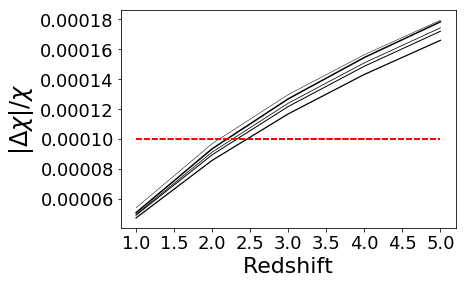

In [37]:
plt.figure()
plt.ylabel(r'$|\Delta\chi|/\chi$',fontsize=24)
plt.xlabel('Redshift',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
for i in range(0,5):
    print(d_ccl[:,i])
    plt.plot(z,np.abs(d_bench[:,i]/d_ccl[:,i]-1),'k-',lw=i*0.25+0.5)
    plt.plot(z, 1e-4*z/z, linestyle='--', color='r')
plt.show()
plt.clf()

#Current issue: CCL distances via python differ from
#distances via ccl_test_distances.c
#For model 1, those are: 
#2.312680e+03
#3.625903e+03
#4.448980e+03
#5.019256e+03
#5.442760e+03

### Cosmological distances (high z)

In [ ]:
bench=np.loadtxt('../tests/benchmark/chi_hiz_model1-3.txt')
z=bench[1:,0]
d_hiz_bench=bench[1:,1:]
scale_fact=1./(1+z)
d_hiz_ccl = np.zeros((len(z),num_models_hiz))

for i in range(num_models_hiz):
    d_hiz_ccl[:,i]=ccl.comoving_radial_distance(cosmo_list_hiz[i],scale_fact)*(cosmo_list[i])['h']

In [ ]:
plt.figure()
plt.ylabel(r'$|\Delta\chi|/\chi$',fontsize=24)
plt.xlabel('Redshift',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
for i in range(0,num_models_hiz):
    plt.plot(z,np.abs(d_hiz_bench[:,i]/d_hiz_ccl[:,i]-1),'k-',lw=i*0.25+0.5)
    plt.plot(z, 1e-4*z/z, linestyle='--', color='r')
plt.show()
plt.clf()

### To-do: ensure all plots match the level of accuracy of Table 3.

### To-do: repeat the same exercise above test by test for all entries in Table 3. This can be done looking at the .c files in tests/

### Growth function (low z)

In [ ]:
bench=np.loadtxt('../tests/benchmark/growth_model1-5.txt')
z=bench[0:,0]
g_bench=bench[0:,1:]
scale_fact=1./(1+z)
g_ccl = np.zeros((len(z),num_models))
for i in range(0,num_models):
    g_ccl[:,i]=ccl.growth_factor(cosmo_list[i],scale_fact)


In [ ]:
plt.figure()
plt.ylabel(r'$|\Delta G|/G$',fontsize=24)
plt.xlabel('Redshift',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
for i in range(0,5):
    plt.plot(z,np.abs(g_bench[:,i]/g_ccl[:,i]-1),'k-',lw=i*0.25+0.5)
    plt.plot(z, 1e-4*z/z, linestyle='--', color='r')
plt.show()
plt.clf()

### Growth function (high z)

In [ ]:

bench=np.loadtxt('../tests/benchmark/growth_hiz_model1-3.txt')
z=bench[0:,0]
num_z = np.shape(bench)[0]
g_hiz_bench=bench[0:,1:]
scale_fact=1./(1+z)

In [ ]:
g_hiz_ccl = np.zeros((num_z, num_models_hiz))
for i in range(num_models_hiz):
    g_hiz_ccl[:,i]=ccl.growth_factor(cosmo_list_hiz[i],scale_fact)

In [ ]:
plt.figure()
plt.ylabel(r'$|\Delta G|/G$',fontsize=24)
plt.xlabel('Redshift',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
for i in range(num_models_hiz):
    plt.plot(z,np.abs(g_hiz_bench[:,i]/g_hiz_ccl[:,i]-1),'k-',lw=i*0.25+0.5)
    plt.plot(z, 1e-4*z/z, linestyle='--', color='r')
plt.show()
plt.clf()

### Testing Mass function

In [ ]:
bench=np.loadtxt('../tests/benchmark/model1_hmf.txt')
z = bench[0:,0]
sigma = bench[0:,1]
invsigma = bench[0:,2]
massfunc = bench[0:,3]

mass = 1e10

plt.plot(z, np.abs(ccl.sigmaM(cosmo_ccl1,mass,scale_fact)/sigma-1))
         
#double absolute_tolerance = SIGMA_TOLERANCE*data->massfunc[0][j];
#    if (fabs(absolute_tolerance)<1e-12) absolute_tolerance = 1e-12;
#    ASSERT_DBL_NEAR_TOL(data->massfunc[0][j], sigma_j, absolute_tolerance);

#    absolute_tolerance = INVSIGMA_TOLERANCE*fabs(data->massfunc[1][j]);
#    if (fabs(absolute_tolerance)<1e-12) absolute_tolerance = 1e-12;
#    ASSERT_DBL_NEAR_TOL(fabs(data->massfunc[1][j]), fabs(loginvsigma_j), absolute_tolerance);

#    absolute_tolerance = MASSFUNC_TOLERANCE*fabs(data->massfunc[2][j]);#
#    if (fabs(absolute_tolerance)<1e-12) absolute_tolerance = 1e-12;
#    ASSERT_DBL_NEAR_TOL(fabs(data->massfunc[2][j]), fabs(logmassfunc_j), absolute_tolerance);


In [ ]:
ccl.sigmaM?
